## Cheap Method
- Train model with n * m training samples
- Each training example has 14 features
- Try using SVM, NN
- Test using your sentinel or some other downloaded data
- Later try other unsupervised pixel classification techniques
- For now, classes are 1 - water and 0 - not water

## This is just to see what happens, to make our segments smooth, finally we have to use a different method (like one pixel class depends on x surrounding pixels' class)

In [1]:
import pandas as pd
from rasterio import plot
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn import svm
from helpers import return_indices
import os

Using TensorFlow backend.


In [2]:
def normalize(image):
    return (image-image.min())/(image.max()-image.min())

In [3]:
mndwi_4_11 = rasterio.open("./All_Indices/mndwi_4_11.tif")

In [4]:
ndvi_8_4 = rasterio.open("./All_Indices/ndvi_8_4.tif")

In [5]:
df = pd.read_csv("./final_data_plantations.csv")

In [6]:
df.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0  0.073560  0.120506  0.147767  0.248286  0.339580  0.397516   
1           1  0.068240  0.107867  0.135269  0.236651  0.324588  0.389422   
2           2  0.060606  0.098061  0.125712  0.236651  0.324588  0.389422   
3           3  0.057830  0.091523  0.119096  0.218990  0.302849  0.361190   
4           4  0.061531  0.088908  0.122036  0.218990  0.302849  0.361190   

          6         7         8         9        10        11        12  \
0  0.374934  0.461866  0.360880  0.231886  0.615230  0.172857  0.658780   
1  0.375990  0.452610  0.359941  0.223745  0.638081  0.156799  0.656807   
2  0.375286  0.452610  0.359941  0.223745  0.654861  0.143589  0.657455   
3  0.338145  0.422991  0.346391  0.213704  0.635540  0.144045  0.678380   
4  0.329519  0.422991  0.346391  0.213704  0.621866  0.148293  0.687091   

   target pixel_positions  
0       0          (0, 0)  
1       0          (0, 1)  
2       0          (0, 2)  
3       0          (0, 3)  
4       0          (0, 4)

In [7]:
df.drop(columns = ["Unnamed: 0"], inplace=True)

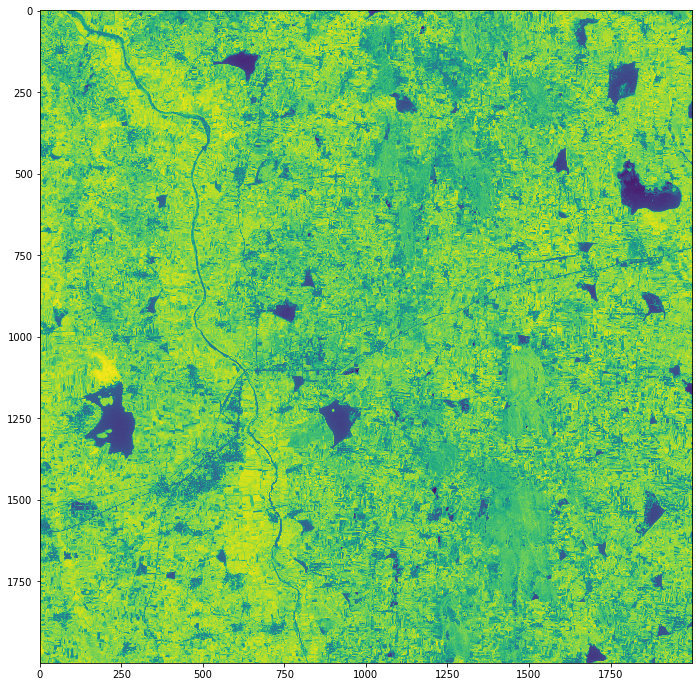

In [13]:
TEST_CROP_Y = [4000, 6000]
TEST_CROP_X = [8000, 10000]
ndvi_8_4 = rasterio.open('./All_Indices/ndvi_8_4.tif').read(1)
fig = plt.figure(figsize=(12,12))
plot.show(ndvi_8_4[TEST_CROP_Y[0]:TEST_CROP_Y[1], TEST_CROP_X[0]:TEST_CROP_X[1]])
# This is used to test

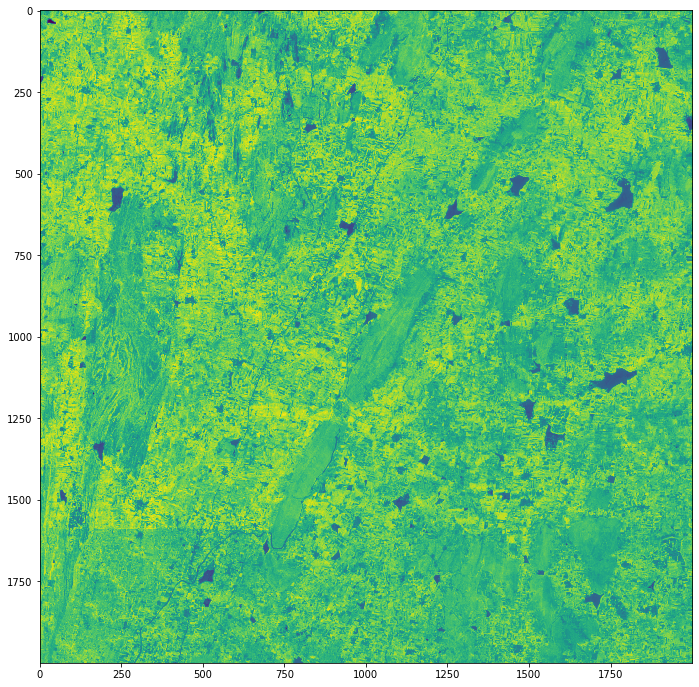

In [12]:
# This was used in training
fig = plt.figure(figsize=(12,12))
plot.show(ndvi_8_4[3000:5000, 4000:6000])

In [14]:
# Check validity of data with pixel_positions field in dataframe and above image
feature_list = ["B2", "B3", "B4", "B05", "B06", "B07", "B8", "B08A", 
                "B11", "B12", "ndvi_8_4", "mndwi_4_11", "ndbi_11_8"]
df[df["target"]==1]

0         1         2         3         4         5         6  \
91       0.017812  0.048594  0.033266  0.134220  0.339018  0.423113  0.380215   
92       0.020356  0.054696  0.030325  0.134220  0.339018  0.423113  0.392537   
93       0.019200  0.048812  0.033450  0.134012  0.362631  0.484472  0.411723   
94       0.017812  0.047941  0.035104  0.134012  0.362631  0.484472  0.497624   
95       0.023826  0.066463  0.038780  0.168710  0.459895  0.581781  0.549375   
...           ...       ...       ...       ...       ...       ...       ...   
3998193  0.050312  0.097625  0.120658  0.213796  0.346514  0.402692  0.390864   
3998194  0.044992  0.091087  0.109171  0.213796  0.346514  0.402692  0.363228   
3998195  0.036780  0.079756  0.080224  0.204758  0.349419  0.405985  0.363404   
3998196  0.057136  0.097516  0.107701  0.204758  0.349419  0.405985  0.410667   
3998197  0.053666  0.092504  0.107609  0.200083  0.348482  0.415867  0.379775   

                7         8         9        10        11        12  target  \
91       0.498704  0.200295  0.097151  0.855840  0.117007  0.434337       1   
92       0.498704  0.200295  0.097151  0.869899  0.109515  0.423755       1   
93       0.541281  0.198149  0.088195  0.872392  0.120008  0.404224       1   
94       0.541281  0.198149  0.088195  0.907090  0.124192  0.342278       1   
95       0.656053  0.225517  0.099864  0.918652  0.102791  0.353078       1   
...           ...       ...       ...       ...       ...       ...     ...   
3998193  0.453628  0.359069  0.233107  0.676470  0.137078  0.642420       1   
3998194  0.453628  0.359069  0.233107  0.676502  0.120478  0.667762       1   
3998195  0.475565  0.357459  0.215400  0.736175  0.077151  0.665873       1   
3998196  0.475565  0.357459  0.215400  0.715084  0.119423  0.623408       1   
3998197  0.483154  0.348471  0.201967  0.692642  0.125608  0.640898       1   

        pixel_positions  
91              (0, 91)  
92              (0, 92)  
93              (0, 93)  
94              (0, 94)  
95              (0, 95)  
...                 ...  
3998193     (1999, 193)  
3998194     (1999, 194)  
3998195     (1999, 195)  
3998196     (1999, 196)  
3998197     (1999, 197)  

[596523 rows x 15 columns]

In [15]:
# Make sure all 1s are present in training data (some train some test)

In [16]:
dataset = (df[df["target"]==1].append(df[df["target"]==0].sample(n=500000))).sample(frac=1)

In [17]:
dataset

0         1         2         3         4         5         6  \
3634043  0.033657  0.055023  0.052748  0.144193  0.308846  0.372483  0.349410   
3620607  0.039093  0.072674  0.055045  0.133700  0.298538  0.396574  0.351963   
3074399  0.024289  0.049030  0.071678  0.138999  0.364130  0.427442  0.368245   
547362   0.043026  0.091087  0.089506  0.146478  0.337144  0.436288  0.424749   
504130   0.055748  0.102855  0.133983  0.240391  0.379498  0.441935  0.429150   
...           ...       ...       ...       ...       ...       ...       ...   
1096218  0.021744  0.034866  0.023709  0.114689  0.224325  0.265951  0.123042   
2864029  0.023595  0.053389  0.037493  0.157906  0.340517  0.418408  0.418412   
743095   0.029840  0.054260  0.035288  0.109703  0.278298  0.359496  0.292906   
1650615  0.028684  0.057311  0.041720  0.126948  0.381747  0.488613  0.424925   
685762   0.033310  0.079974  0.052012  0.153750  0.429348  0.546772  0.556064   

                7         8         9        10        11        12  target  \
3634043  0.445853  0.254360  0.138942  0.788568  0.105551  0.549905       0   
3620607  0.403184  0.137644  0.066893  0.784870  0.269350  0.334085       0   
3074399  0.495372  0.250470  0.148711  0.758354  0.147423  0.526213       0   
547362   0.490374  0.219882  0.119810  0.759346  0.216201  0.430234       1   
504130   0.521474  0.367051  0.262280  0.680853  0.149920  0.618110       1   
...           ...       ...       ...       ...       ...       ...     ...   
1096218  0.303406  0.130802  0.060516  0.616739  0.193952  0.627490       1   
2864029  0.501111  0.321706  0.177476  0.866345  0.024115  0.576366       0   
743095   0.384857  0.129863  0.058209  0.790957  0.230943  0.371745       1   
1650615  0.558867  0.199356  0.101764  0.860004  0.139108  0.395905       1   
685762   0.616994  0.236920  0.101900  0.895632  0.120863  0.365794       1   

        pixel_positions  
3634043      (1817, 43)  
3620607     (1810, 607)  
3074399     (1537, 399)  
547362      (273, 1362)  
504130       (252, 130)  
...                 ...  
1096218      (548, 218)  
2864029      (1432, 29)  
743095      (371, 1095)  
1650615      (825, 615)  
685762      (342, 1762)  

[1096523 rows x 15 columns]

In [18]:
# All training samples with low mndwi value
low = df[df["11"]<0.5]

# All training samples with high mndwi value
high = df[df["11"]>=0.5]

len(low), len(high)

(3958711, 41289)

In [19]:
# Among lows, 0s should be higher percentage of the target
print(len(low[low["target"]==1]), len(low[low["target"]==0]))

# Among highs, 1s should be higher percentage of the target
print(len(high[high["target"]==1]), len(high[high["target"]==0]))

595582 3363129
941 40348


In [21]:
print(83742  / 1271448)
print(399204  / 454380)

# So, 6.6% of samples with a low mndwi value are water
# And, 12.15% of samples with a high mndwi value are non-water elements

0.06586348792872379
0.878568598970025


In [20]:
#X = dataset.drop(columns = ["target", "pixel_positions"])
X = dataset.drop(columns = ["target", "pixel_positions"]) # using all features
y = dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train.shape[0], X_test.shape[0]

(734670, 361853)

In [22]:
1 - sum(y_train==1)/y_train.shape[0] # No skew towards any type of samples

0.4556181687015939

In [23]:
model = tf.keras.Sequential([
    layers.Dense(256, activation=LeakyReLU(), input_shape=(13,)),
    layers.Dense(256, activation=LeakyReLU()),
    layers.Dropout(0.2),
    layers.Dense(256, activation=LeakyReLU()),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 135,425
Trainable params: 135,425
Non-trainable params: 0
__________________________________________________

In [25]:
model.fit(x = X_train, y = y_train, batch_size = 256, epochs = 10, validation_split = 0.2)

Train on 587736 samples, validate on 146934 samples
Epoch 1/10
587736/587736 [==============================] - 8s 13us/sample - loss: 0.6248 - acc: 0.6550 - val_loss: 0.6375 - val_acc: 0.6514
Epoch 2/10
587736/587736 [==============================] - 7s 12us/sample - loss: 0.6161 - acc: 0.6616 - val_loss: 0.6169 - val_acc: 0.6559
Epoch 3/10
587736/587736 [==============================] - 8s 13us/sample - loss: 0.6126 - acc: 0.6642 - val_loss: 0.6017 - val_acc: 0.6737
Epoch 4/10
587736/587736 [==============================] - 8s 13us/sample - loss: 0.6107 - acc: 0.6657 - val_loss: 0.6056 - val_acc: 0.6756
Epoch 5/10
587736/587736 [==============================] - 7s 12us/sample - loss: 0.6099 - acc: 0.6660 - val_loss: 0.6156 - val_acc: 0.6574
Epoch 6/10
587736/587736 [==============================] - 8s 13us/sample - loss: 0.6088 - acc: 0.6668 - val_loss: 0.6092 - val_acc: 0.6665
Epoch 7/10
587736/587736 [==============================] - 7s 12us/sample - loss: 0.6079 - acc: 0.667

In [26]:
sum(y_train)/len(y_train)

0.5443818312984061

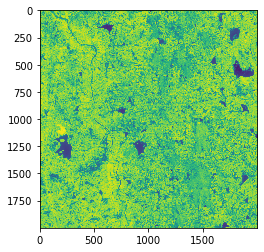

In [27]:
plot.show(ndvi_8_4[TEST_CROP_Y[0]:TEST_CROP_Y[1], TEST_CROP_X[0]:TEST_CROP_X[1]])

In [29]:
# Construct test data
# Replace file names with others if necessary
blue = rasterio.open('./All_Indices/S2_Mandya_B2.tif')
green = rasterio.open('./All_Indices/S2_Mandya_B3.tif')
red = rasterio.open('./All_Indices/S2_Mandya_B4.tif')
vre5 = rasterio.open('./All_Indices/S2_Mandya_B05.tif')
vre6 = rasterio.open('./All_Indices/S2_Mandya_B06.tif')
vre7 = rasterio.open('./All_Indices/S2_Mandya_B07.tif')
nir = rasterio.open('./All_Indices/S2_Mandya_B8.tif')
vre8a = rasterio.open('./All_Indices/S2_Mandya_B08A.tif')
swir11 = rasterio.open('./All_Indices/S2_Mandya_B11.tif')
swir12 = rasterio.open('./All_Indices/S2_Mandya_B12.tif')

In [30]:
test_feature_list = [blue, green, red, vre5, vre6, vre7, nir, vre8a, swir11, swir12]
test_feature_array = []

In [31]:
# Indices are computed in helpers
for feature in test_feature_list:
    image = feature.read(1)
    test_feature_array.append(image[TEST_CROP_Y[0]:TEST_CROP_Y[1], TEST_CROP_X[0]:TEST_CROP_X[1]])

In [32]:
ndvi, mndwi, ndbi = return_indices(test_feature_array)

In [33]:
test_feature_array.append(ndvi)
test_feature_array.append(mndwi)
test_feature_array.append(ndbi)

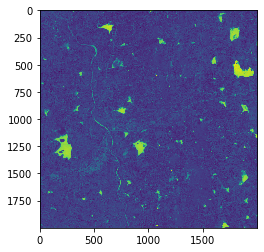

In [34]:
# ndvi from rasterio
plot.show(test_feature_array[-2])

In [35]:
normalized_features = []
for i in range(len(test_feature_array)):
    print(i)
    normalized_features.append(normalize(test_feature_array[i]))

0
1
2
3
4
5
6
7
8
9
10
11
12


In [46]:
normalized_features = np.array(normalized_features)
shp = normalized_features.shape

In [47]:
normalized_features = normalized_features.reshape((shp[0], shp[1]*shp[2]))
normalized_features.shape

IndexError: tuple index out of range

In [48]:
normalized_features = normalized_features.T
normalized_features.shape

(4000000, 13)

In [49]:
normalized_features[0].shape

(13,)

In [50]:
y_pred = model.predict(normalized_features)

In [51]:
y_pred.shape

(4000000, 1)

In [59]:
y_pred[y_pred >= 0.7] = 255
y_pred[y_pred < 0.7] = 0

shape = y_pred.shape[0]

In [60]:
y_pred.shape

(4000000, 1)

In [61]:
len(y_pred[y_pred == 255])

1407474

In [62]:
final_image = y_pred.reshape((2000, 2000))

In [63]:
final_image.shape

(2000, 2000)

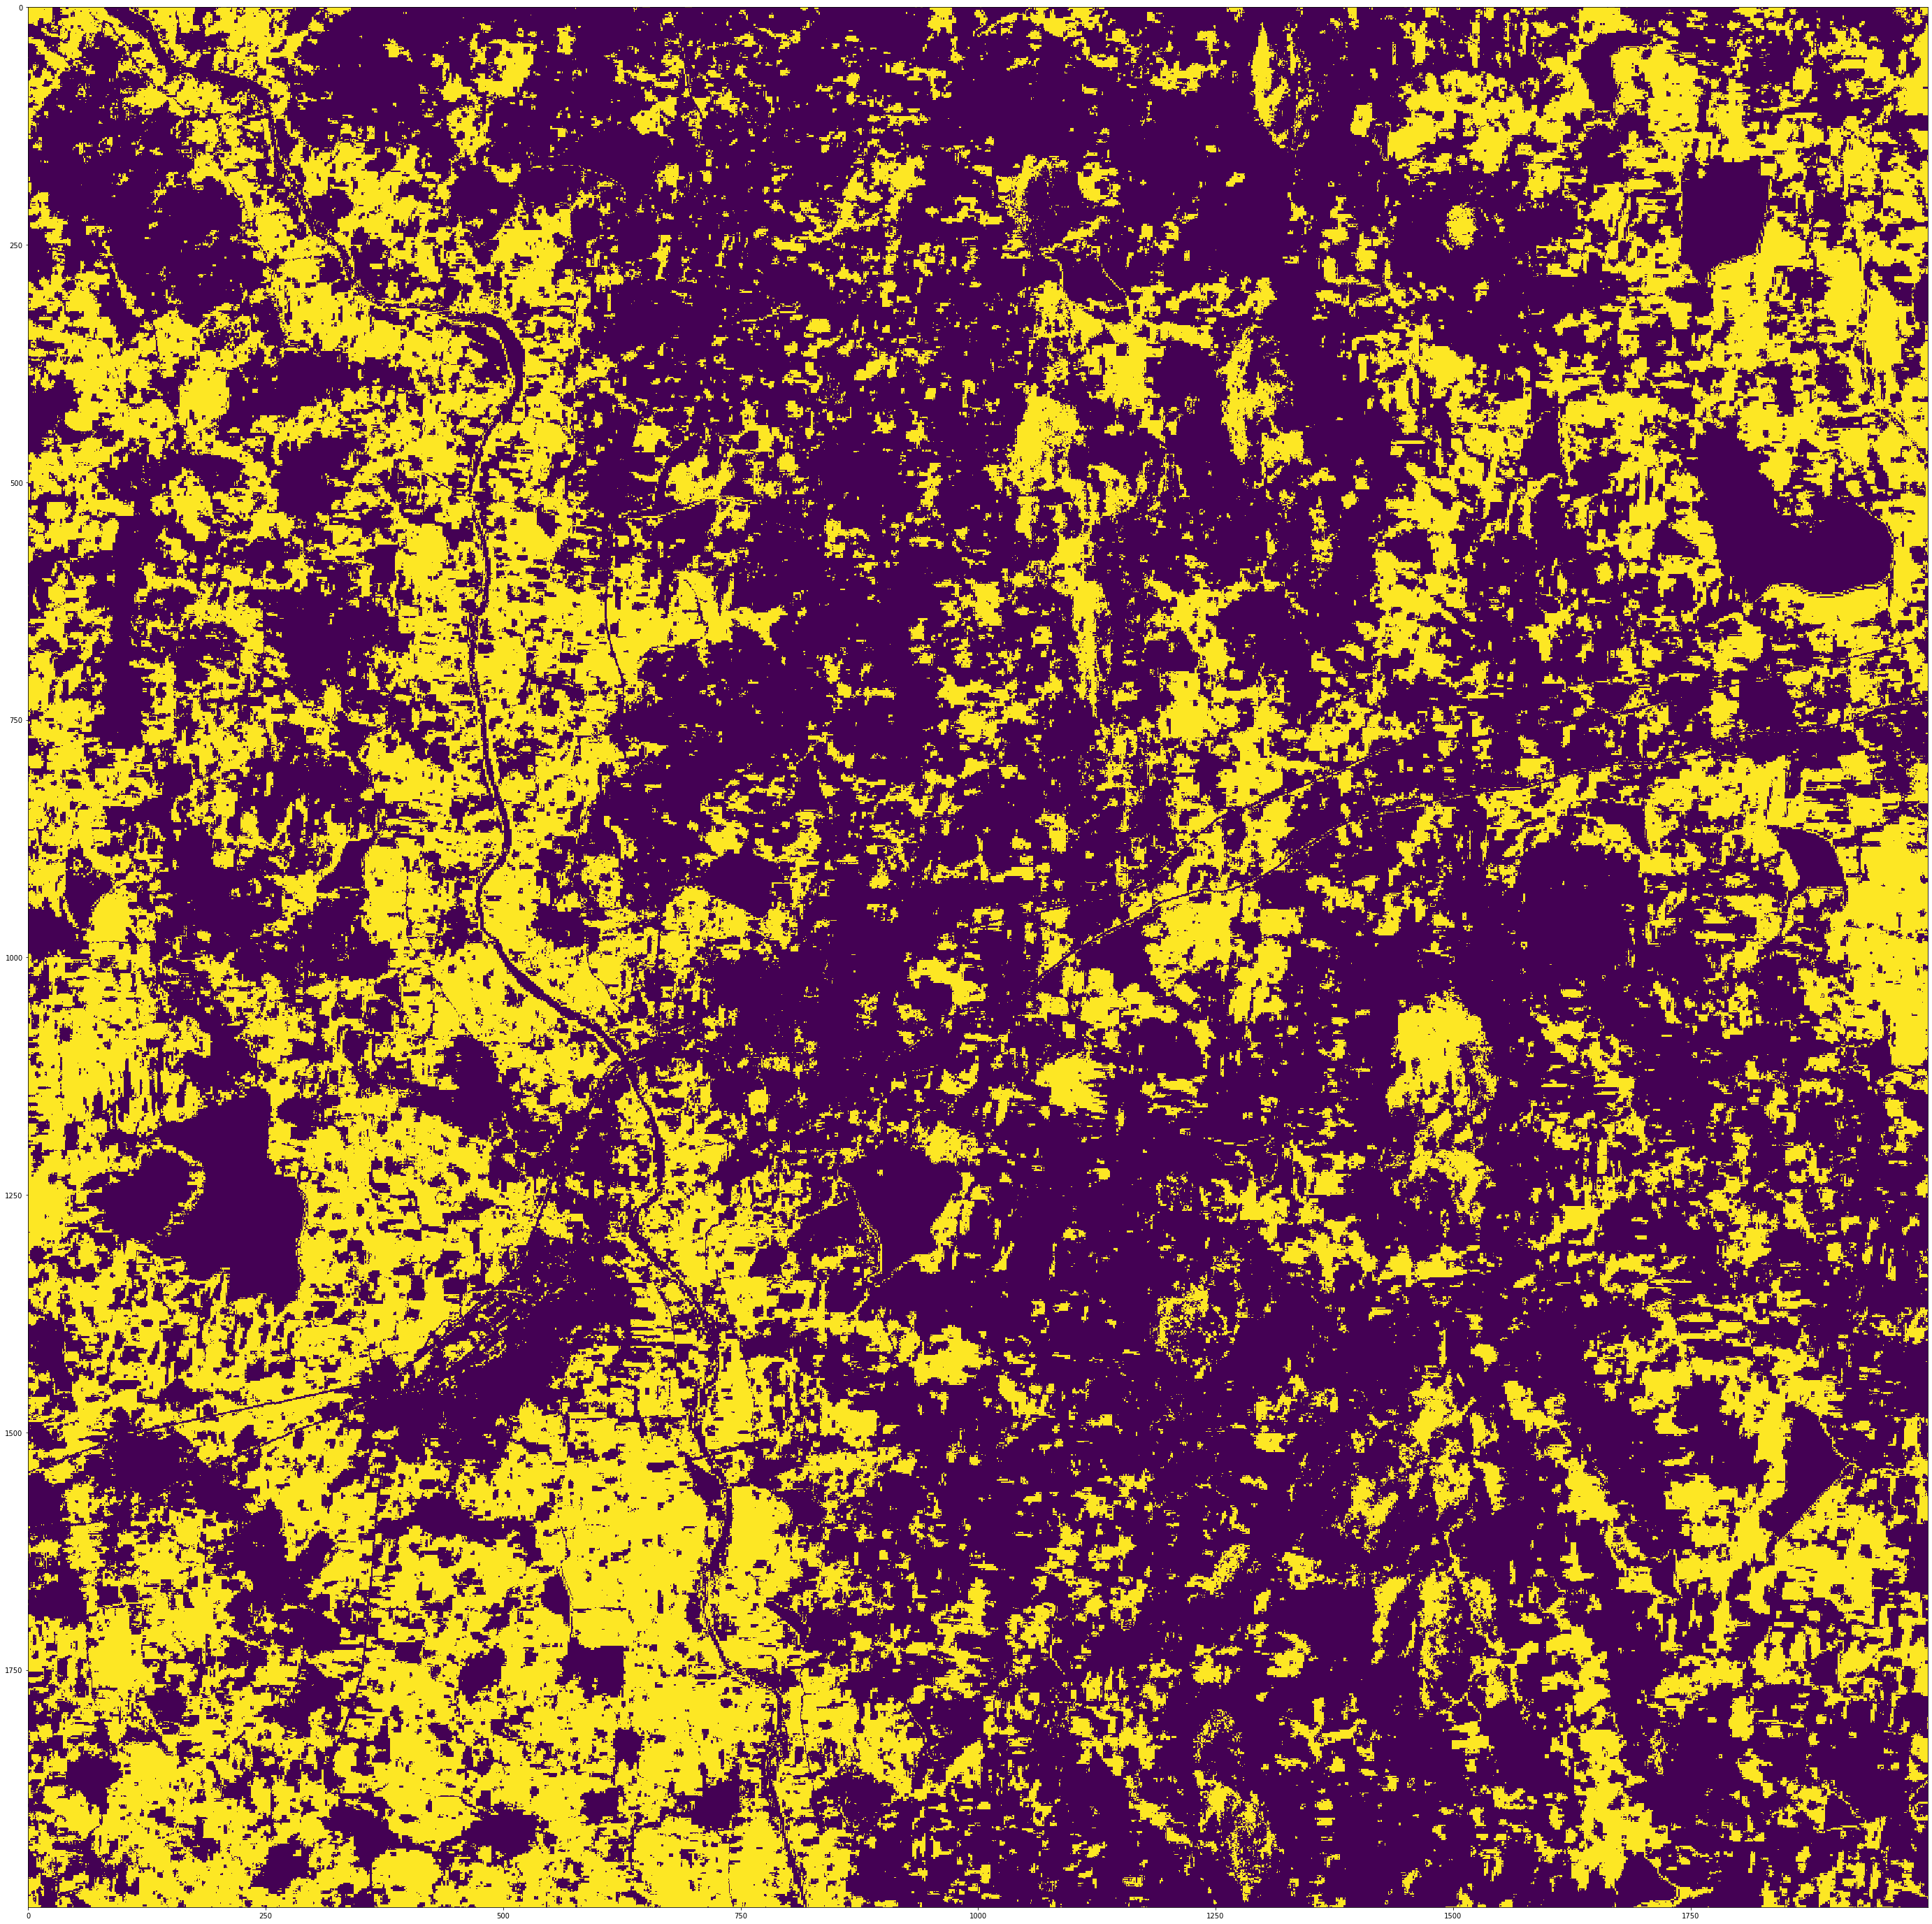

In [64]:
fig = plt.figure(figsize = (50,50))
plot.show(final_image)

In [65]:
fig = plt.figure(figsize = (50,50))
plot.show(np.array(test_image))

NameError: name 'test_image' is not defined

<Figure size 3600x3600 with 0 Axes>

In [ ]:
results = model.predict(X_test)

In [ ]:
for i in range(len(results)):
    print(y_test[i:i+1], results[i])

In [ ]:
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

In [ ]:
arr = clf.predict(X_test)

In [ ]:
pd.DataFrame(X_test)

In [ ]:
a, b = list(arr), list(y_test)
true_count = 0
for i in range(6000):
    if(a[i] == b[i]):
        true_count+=1
        print(a[i], b[i], "True")
    else:
        print(a[i], b[i], "False")

In [ ]:
true_count

In [ ]:
X_train